In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Data_cars.csv')
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


(array([7.5674e+04, 6.9703e+04, 1.3759e+04, 4.0390e+03, 1.6100e+03,
        7.8800e+02, 3.7200e+02, 2.1000e+02, 1.4700e+02, 1.1800e+02,
        5.4000e+01, 4.0000e+01, 5.1000e+01, 3.6000e+01, 2.5000e+01,
        1.3000e+01, 8.0000e+00, 8.0000e+00, 6.0000e+00, 7.0000e+00,
        7.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

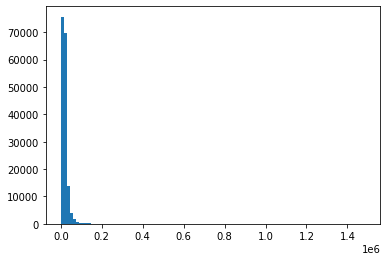

In [3]:
plt.hist(df['Price'], bins=100, range=(df['Price'].min(), df['Price'].max()))

In [4]:
df['Make'].value_counts()

RENAULT        30690
PEUGEOT        26119
CITROEN        17609
VOLKSWAGEN     11241
BMW             9424
               ...  
BELLIER            1
FISKER             1
AUTOBIANCHI        1
INNOCENTI          1
BURBY S            1
Name: Make, Length: 92, dtype: int64

In [5]:
df['Model'].value_counts().head()

CLIO      7967
308       6123
208       6053
MEGANE    5212
CAPTUR    4410
Name: Model, dtype: int64

In [6]:
df['Fuel'].value_counts()

Diesel                              109446
Essence                              53392
Hybride essence électrique            2725
Electrique                             704
Hybride diesel électrique              310
Bicarburation essence GPL               96
Bicarburation essence bioéthanol        21
Bicarburation essence GNV                1
Name: Fuel, dtype: int64

In [7]:
df['Gearbox'].value_counts()

mécanique      113014
automatique     53681
Name: Gearbox, dtype: int64

In [8]:
dict_handwritten = {
        "Price": {
            "type": "numerical",
            "description": "Price of the car",
        },
        "Make": {
            "type": "categorical",
            "description": "Brand of the car"
        },
        "Model": {
            "type": "categorical",
            "description": "Model of the car"
        },
        "Model_year": {
            "type": "date",
            "description": "Year of release of the model"
        },
        "Mileage": {
            "type": "numerical",
            "description": "Distance ride by the car"
        },
        "Fuel": {
            "type": "categorical",
            "description": "Type of fuel"
        },
        "Gearbox": {
            "type": "categorical",
            "description": "Type of gearbox"
        },
        "Online": {
            "type": "date",
            "description": "publishing date of the offer"
        },
        "Description": {
            "type": "text",
            "description": "text written by the user about the offer"
        },
    }

In [9]:
for item in dict_handwritten.items():
    feature_name = item[0]
    feature_type = item[1]['type']
    feature_description = item[1]['description']
    if feature_type == "numerical":
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        dict_handwritten.get(feature_name).update({'max_value': max_value})
        dict_handwritten.get(feature_name).update({'min_value': min_value})
    if feature_type == "categorical":
        unique_value = df[feature_name].unique()
        dict_handwritten.get(feature_name).update({'unique_value': list(unique_value)})

In [10]:
dict_handwritten

{'Price': {'type': 'numerical',
  'description': 'Price of the car',
  'max_value': 1486500.0,
  'min_value': 1.0},
 'Make': {'type': 'categorical',
  'description': 'Brand of the car',
  'unique_value': ['PEUGEOT',
   'BMW',
   'AUDI',
   'FORD',
   'FIAT',
   'RENAULT',
   'MERCEDES',
   'SEAT',
   'MINI',
   'HYUNDAI',
   'DACIA',
   'VOLKSWAGEN',
   'CITROEN',
   'TOYOTA',
   'JAGUAR',
   'OPEL',
   'PORSCHE',
   'NISSAN',
   'LAND ROVER',
   'MAZDA',
   'VOLVO',
   'SKODA',
   'DS',
   'SSANGYONG',
   'SUZUKI',
   'HONDA',
   'LEXUS',
   'INFINITI',
   'JEEP',
   'KIA',
   'DODGE',
   'ASTON MARTIN',
   'LANCIA',
   'LOTUS',
   'CHEVROLET',
   'SMART',
   'ALFA ROMEO',
   'BUGATTI',
   'MITSUBISHI',
   'MERCEDES-AMG',
   'AIXAM',
   'FERRARI',
   'MG',
   'LAMBORGHINI',
   'MASERATI',
   'SUBARU',
   'MORGAN',
   'CHRYSLER',
   'ROLLS ROYCE',
   'TESLA',
   'ABARTH',
   'LADA',
   'BMW-ALPINA',
   'SAAB',
   'PACKARD',
   'CADILLAC',
   'ROVER',
   'SHELBY',
   'MICROCAR',
   'ALP

In [15]:
df['Description'][0]

"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;o

In [ ]:
df.head()